# Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
from datetime import datetime
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

# Importing Data

In [2]:
path=r"C:\Users\Sam\Desktop\CF\Project 6 WORLD BANK\datasets\SPI Scores Clean and Formated 6.2.csv"
d=pd.read_csv(os.path.join(path))

In [3]:
# checking for execution
d.head()

,Country,Date,Data Use,Data Services,Data Products,Data Sources,Data Infrastructure,SPI Score,Income,Region,Population,Score Category
0,Finland,2022,100.0,96.433333,88.48750,83.258333,100.0,93.635833,High income,Europe & Central Asia,5556106.0,High Score
1,Norway,2022,100.0,97.133333,87.23750,83.108333,100.0,93.495833,High income,Europe & Central Asia,5457127.0,High Score
2,Canada,2022,100.0,92.600000,83.68750,88.325000,100.0,92.922500,High income,North America,38929902.0,High Score
3,Netherlands,2022,100.0,96.900000,87.76875,79.458333,100.0,92.825417,High income,Europe & Central Asia,17700982.0,High Score
4,United States,2022,100.0,93.600000,85.95000,84.400000,100.0,92.790000,High income,North America,333287557.0,High Score


In [4]:
d.shape

(1524, 12)

### Creating a subset for analysis

In [5]:
d1=d[["Country","Date","SPI Score"]]

In [6]:
# checking for execution
d1

,Country,Date,SPI Score
0,Finland,2022,93.635833
1,Norway,2022,93.495833
2,Canada,2022,92.922500
3,Netherlands,2022,92.825417
4,United States,2022,92.790000
...,...,...,...
1519,Tonga,2016,64.070000
1520,Turks and Caicos Islands,2016,64.070000
1521,Tuvalu,2016,64.070000
1522,Virgin Islands (U.S.),2016,64.070000


In [13]:
# limiting the data for time-series analysis to just United States
df=d1[(d1["Country"] == "United States")]

In [93]:
df

,Country,Date,SPI Score,datetime
4,United States,2022,92.790000,2022-01-01
221,United States,2021,92.750000,2021-01-01
439,United States,2020,89.565000,2020-01-01
657,United States,2019,88.923750,2019-01-01
874,United States,2018,88.916250,2018-01-01
1095,United States,2017,87.109167,2017-01-01
1307,United States,2016,89.636667,2016-01-01


In [105]:
df_ama=df[["SPI Score", "Date"]]

In [106]:
df_ama

,SPI Score,Date
4,92.790000,2022
221,92.750000,2021
439,89.565000,2020
657,88.923750,2019
874,88.916250,2018
1095,87.109167,2017
1307,89.636667,2016


In [108]:
df_ama['datetime'] = pd.to_datetime((df_ama['Date']), format="%Y")
df_ama = df_ama.set_index("datetime") 
df_ama.drop(["Date"], axis=1, inplace=True)
df_ama.head()

,SPI Score
datetime,
2022-01-01,92.79000
2021-01-01,92.75000
2020-01-01,89.56500
2019-01-01,88.92375
2018-01-01,88.91625


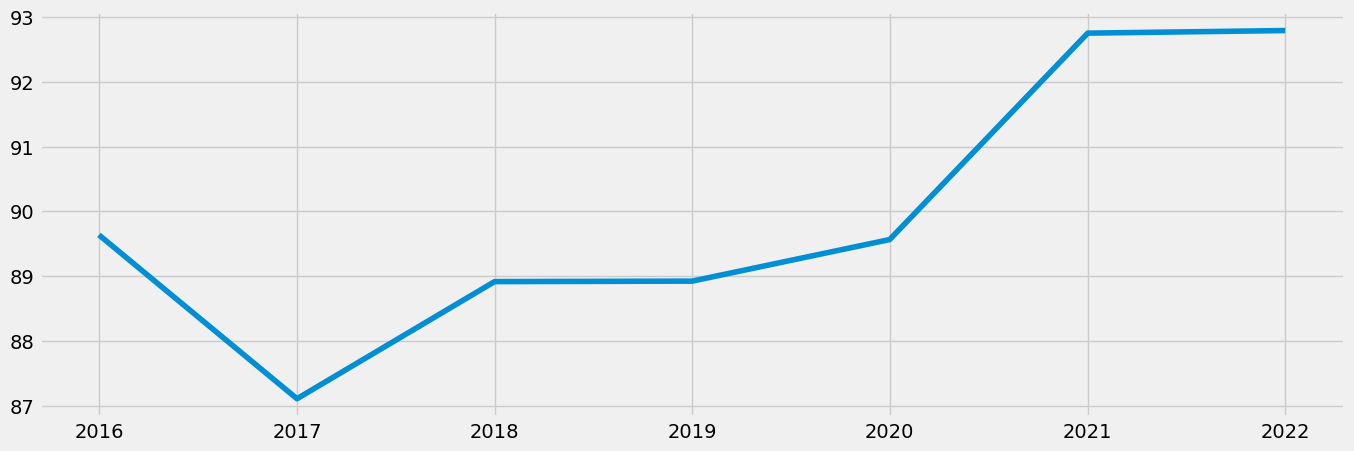

In [109]:
plt.figure(figsize=(15,5),dpi=100)
plt.plot(df_ama)

### Data in non_stationary; moreover, it shows a clear higher score received after the pandemic.

## Decomposition

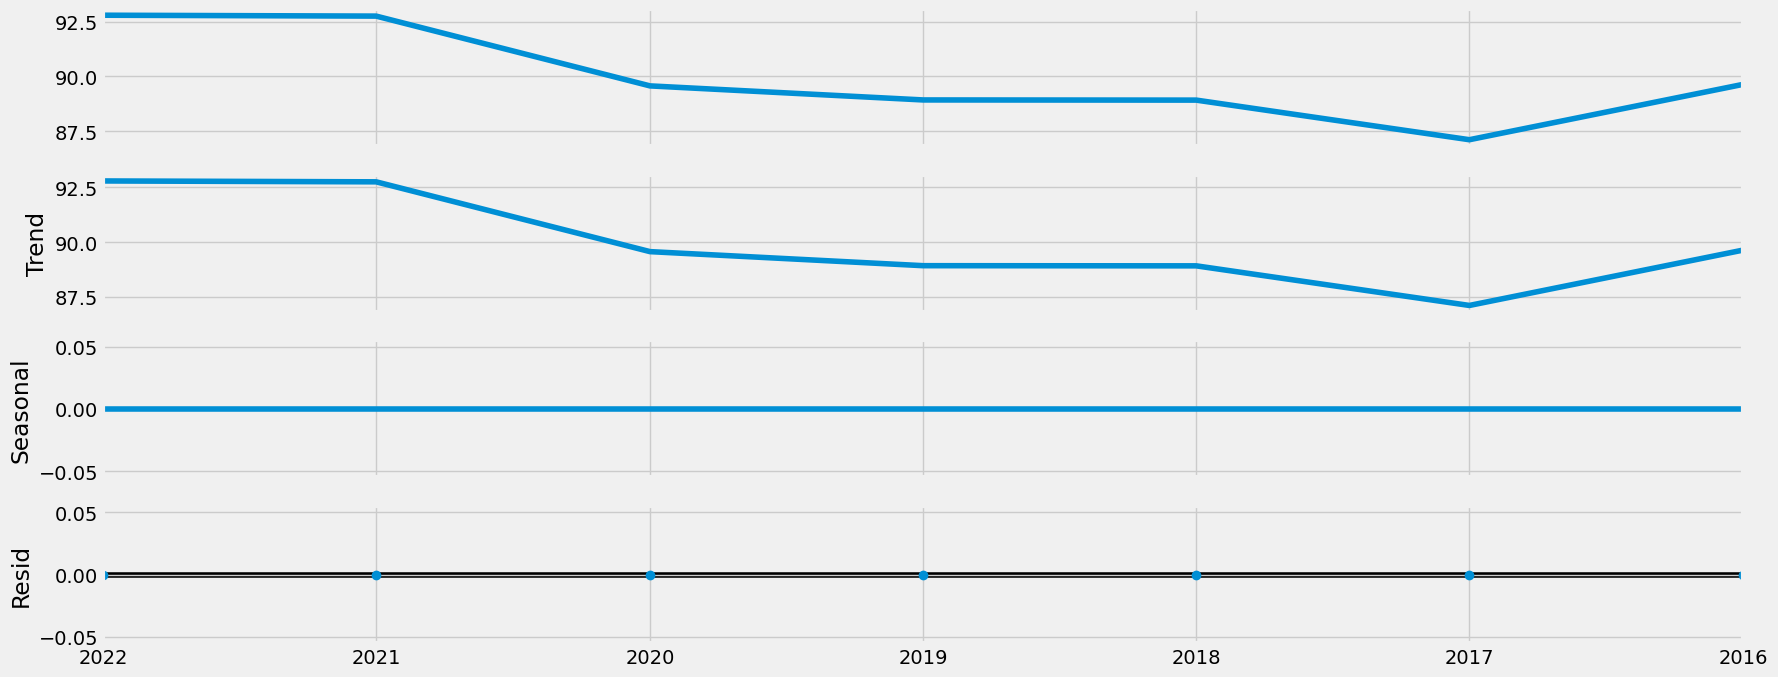

In [111]:
decomposition = sm.tsa.seasonal_decompose(df_ama, model="additive")
rcParams["figure.figsize"] = 18, 7
# Plotting the separate components
decomposition.plot()
plt.show()

## Testing the stationarity

In [112]:
def dickey_fuller(timeseries): 
    print ("Dickey-Fuller Stationarity test:")
    test = adfuller(timeseries, autolag="AIC")
    result = pd.Series(test[0:4], index=["Test Statistic","p-value","Number of Lags Used","Number of Observations Used"])
    for key,value in test[4].items():
       result["Critical Value (%s)"%key] = value
    print (result)
dickey_fuller(df_ama["SPI Score"])

Dickey-Fuller Stationarity test:
Test Statistic                -1.623680
p-value                        0.470801
Number of Lags Used            0.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


### The test statistics of -1.6 is significatnly higher bigger that any of the critical values, meaning that the Ho can not be rejecting, indicating that there is a uniroot in the data and that the data is non-stationary.

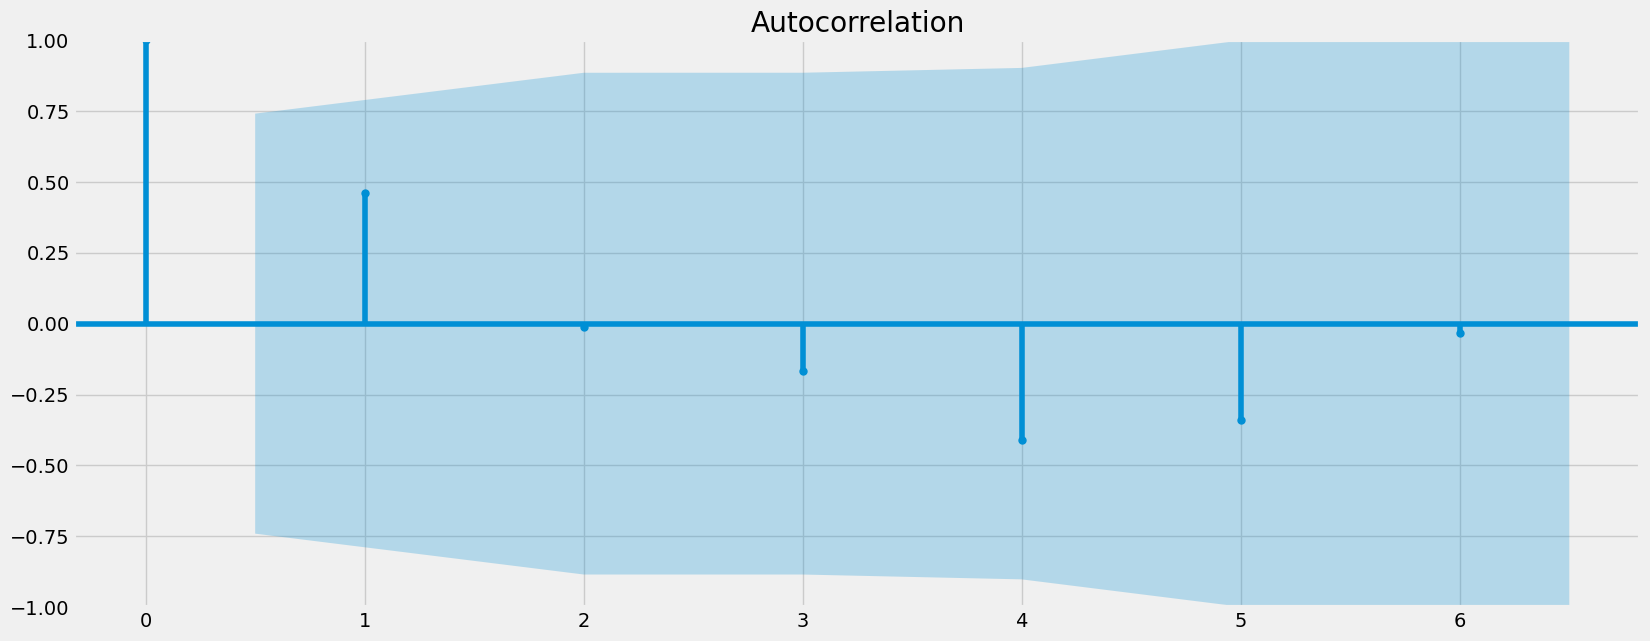

In [114]:
# checking the autocorrelation
plot_acf(df_ama)
plt.show()

### Almost all lines are within the confidence interval, meaning that we have lags that are not correlated with each other, suggesting that the data is stationary.

# Stationarizing the data

In [115]:
data_diff=df_ama-df_ama.shift(1)
# dropping the missing values that came as a result of the differencing to be able to perform a Dickey-Fuller test
data_diff.dropna(inplace = True)
# checking for execution
data_diff.head()

,SPI Score
datetime,
2021-01-01,-0.040000
2020-01-01,-3.185000
2019-01-01,-0.641250
2018-01-01,-0.007500
2017-01-01,-1.807083


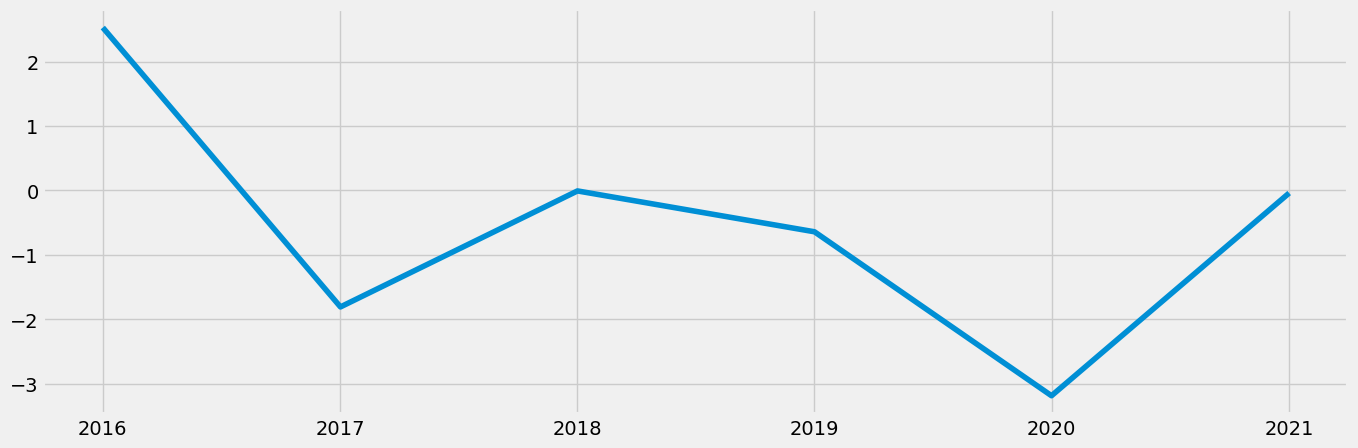

In [116]:
# Checking what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

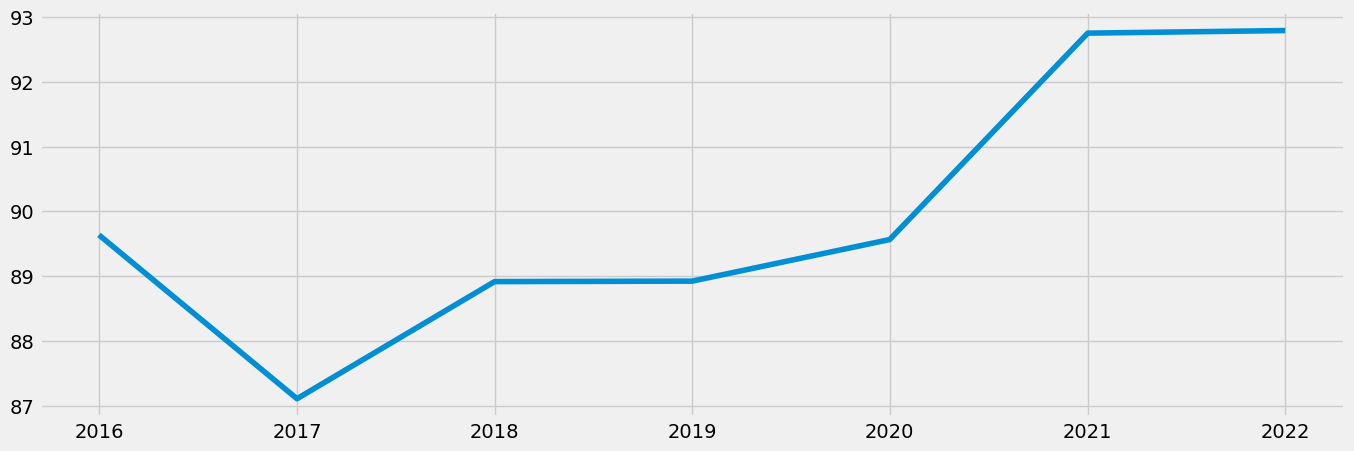

In [117]:
# comparing
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_ama)

In [118]:
# performing a Dickey_fuller test on the differentiated data by executing the function created earlier
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -2.305398
p-value                        0.170233
Number of Lags Used            0.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


### Test stats is still larger than any of the critical values, which means that the differentiantion has to be repeated.

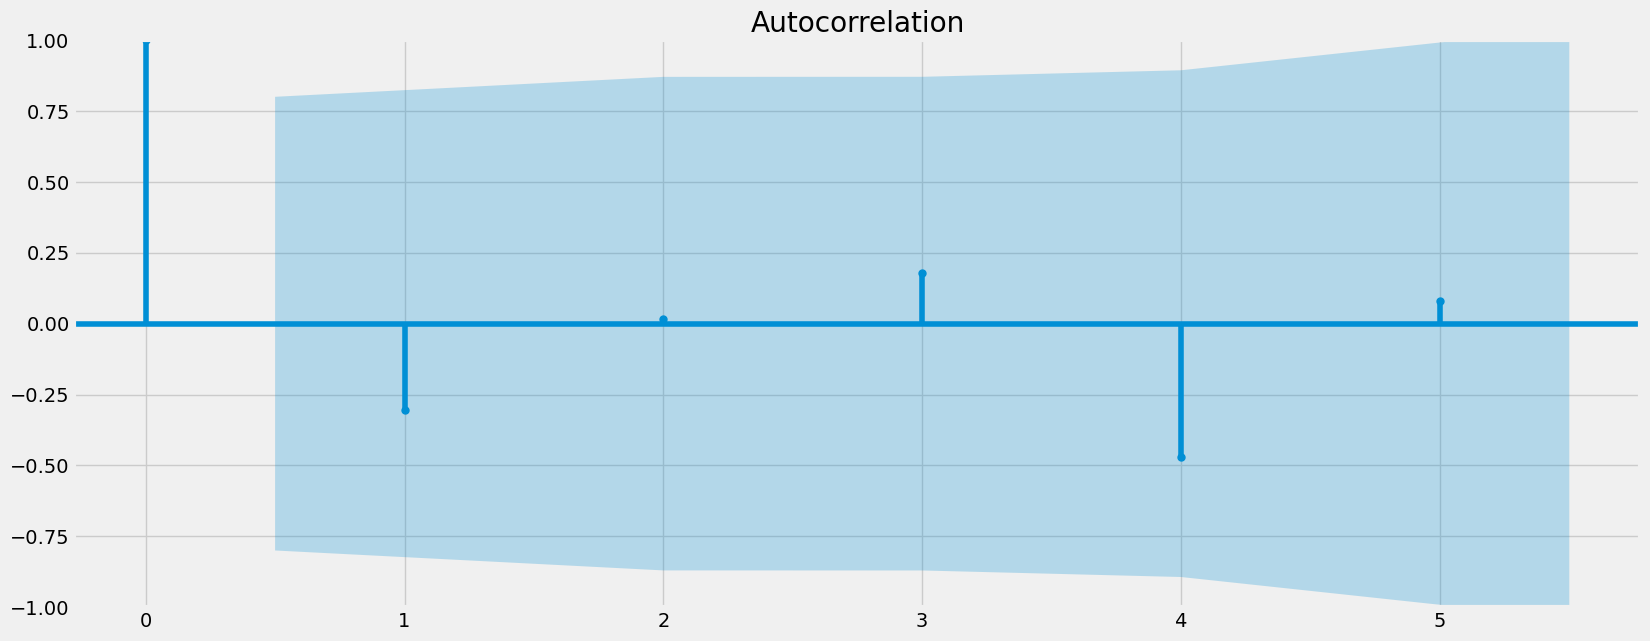

In [119]:
# checking autocorrelation
plot_acf(data_diff)
plt.show()

## Repearing differentianting to achieve stationarity

In [120]:
data_diff_1=data_diff-data_diff.shift(1)
# dropping the missing values that came as a result of the differencing to be able to perform a Dickey-Fuller test
data_diff_1.dropna(inplace = True)
# checking for execution
data_diff_1.head()

,SPI Score
datetime,
2020-01-01,-3.145000
2019-01-01,2.543750
2018-01-01,0.633750
2017-01-01,-1.799583
2016-01-01,4.334583


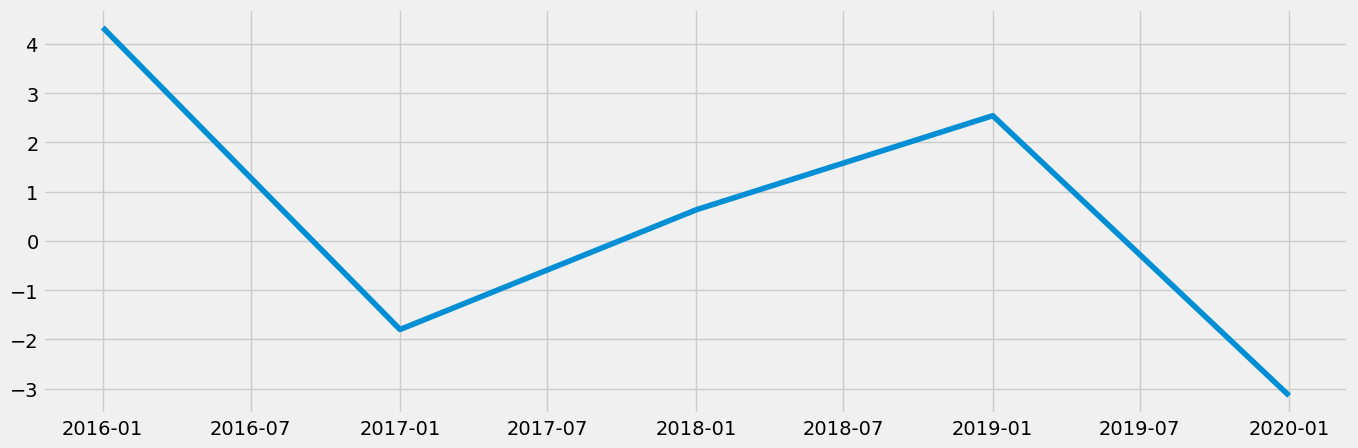

In [121]:
# Checking checking for the result of the second diffrentiating
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_1)

In [122]:
# performing a Dickey_fuller test on the second differentiated data 
dickey_fuller(data_diff_1)

Dickey-Fuller Stationarity test:
Test Statistic                -2.956459
p-value                        0.039165
Number of Lags Used            0.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


In [123]:
# repeating the diffentiating steps
data_diff_2=data_diff_1-data_diff_1.shift(1)
# dropping the missing values that came as a result of the differencing to be able to perform a Dickey-Fuller test
data_diff_2.dropna(inplace = True)
# checking for execution
data_diff_2.head()

,SPI Score
datetime,
2019-01-01,5.688750
2018-01-01,-1.910000
2017-01-01,-2.433333
2016-01-01,6.134167


In [124]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.676388
p-value                         0.443318
Number of Lags Used             0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


### Data has a relatively few number of data points, so the statistical test lacks enough power. Differentiating creares a new non-stationary data.